Import Lib

In [72]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def boston_dataset():
    (train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
    return (train_data, train_targets), (test_data, test_targets)

In [ ]:
def preparingdata(train_data=None, test_data=None):
    #Database normalization
    mean = train_data.mean(axis=0)
    train_data -= mean
    std = train_data.std(axis=0)
    train_data /= std
    test_data -=mean
    test_data /= std
    return train_data, test_data

In [ ]:
def model_build():
    model = keras.Sequential(
        layers=[
            layers.Dense(64, activation="relu"),
            layers.Dense(64, activation="relu"),
            layers.Dense(1),
                ]
    )
    model.compile(optimizer="rmsprop", loss = "mse", metrics=["mae"])
    return model

In [69]:
if __name__ == "__main__":
    (train_data, train_targets), (test_data, test_targets) = boston_dataset()
    train_data, test_data = preparingdata(train_data=train_data, test_data=test_data)

    k = 4
    num_val_samples = len(train_data) // k
    num_epochs = 500
    all_mae_histories = []
    all_scores = []
    for i in range(k):
      print(f"Proccessing fold #{i}")
      val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
      val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
      partial_train_data = np.concatenate(
          [
              train_data[: i * num_val_samples],
              train_data[(i + 1) * num_val_samples :]
          ], axis=0)
      partial_target_data = np.concatenate(
          [
              train_targets[: i * num_val_samples],
              train_targets[(i + 1) * num_val_samples:]
          ]
      )

      ##########################################################################
      #model training
      model = model_build()
      history = model.fit(partial_train_data, partial_target_data, epochs=num_epochs,
                validation_data= (val_data, val_targets), batch_size=16, verbose=0)
      mse_history = history.history["val_mae"]
      all_mae_histories.append(mse_history)
      
    


Proccessing fold #0
Proccessing fold #1
Proccessing fold #2
Proccessing fold #3


In [179]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]


In [180]:
average_mae_history

[19.002596378326416,
 15.386640310287476,
 11.160998344421387,
 7.602283954620361,
 5.73440146446228,
 4.7635257840156555,
 4.220547080039978,
 3.886834502220154,
 3.6760324835777283,
 3.457507014274597,
 3.3100703358650208,
 3.2157583832740784,
 3.0902382135391235,
 3.009539842605591,
 2.9220399856567383,
 2.827537715435028,
 2.8631256818771362,
 2.782065749168396,
 2.7432284355163574,
 2.6618699431419373,
 2.6420812010765076,
 2.625879466533661,
 2.651460349559784,
 2.6008517742156982,
 2.5928918719291687,
 2.610190451145172,
 2.5390095114707947,
 2.4775590896606445,
 2.5229249000549316,
 2.5217894911766052,
 2.460027277469635,
 2.491307497024536,
 2.4647793769836426,
 2.5161299109458923,
 2.473984956741333,
 2.418493330478668,
 2.4257094264030457,
 2.490466356277466,
 2.4585697054862976,
 2.436644971370697,
 2.419958233833313,
 2.4026564359664917,
 2.409318745136261,
 2.3780353367328644,
 2.471520960330963,
 2.387062221765518,
 2.3893675804138184,
 2.4488584399223328,
 2.39513731002

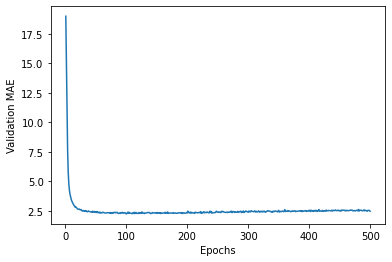

In [181]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()